# Concepts

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

# Penguins: Exploring Some Key Concepts

We'll be using the *penguins* data that we have seen before in order
to introduce, understand and work with these concepts:

- Unsupervised and Supervised Learning, parameters
- Binary Classifiers
- Decision Boundaries
- Confusion Matrices
- True and False Postives and Negatives
- sensitivity, specificity, precision, recall, F1 score, prevalence,

We will also discuss the fairness dilemma, using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in machine learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is no more than Chapter 12 of our reference book [MLFCES] as introduced in an earlier session:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>

First we bring in our standard imports...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import time

... plus the newer ones we learned about last time. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Back to where we were

We'll bring in the penguins data set and clean it up just as in the previous session. 
we do this bit quickly because there is nothing new here.


In [3]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)

In [4]:
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We have already seen how we can use $k$-NN to predict the species in
column zero, from the numerical data in columns 2 - 5.

Here is that code again...

We fitted the model using the Manhattan metric:
$\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert_1$, 
and then plotted the confusion matrix and performance data. 

In [6]:
# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [7]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [9]:
# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

In [10]:
# create a confusion matrix to assess the performance
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",); print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[61  0  0]
 [ 2 18  0]
 [ 0  0 53]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        61
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      1.00      1.00        53

    accuracy                           0.99       134
   macro avg       0.99      0.97      0.98       134
weighted avg       0.99      0.99      0.98       134

Accuracy: 0.9850746268656716


### The Confusion Matrix and Associated Values
Need some explanation here or in previous knn notebook

## Binary Classifier

What we are doing above is _**classifying**_: given data from a specific observation
we are deciding what class that observation belongs to.

In the case above we are attempting to use physiological data to classify the 
species of penguin.

A particularly important type of classifier arises when we are simply trying to
decide 'Yes' or 'No', or 'True' or 'False', 'Guilty' or 'Innocent', 
'Diseased' or 'Healthy' and so on.

Such a classifier is called a **Binary Classifier**, and the confusion matrix bears
further discussion in this case.

Let's return to the penguin data and try to predict gender from the other
physiological characteristics. This will be a binary classifier, because 
it will either predict 'Male' or 'Female'.

Let's start by recalling the structure of the data frame.


In [11]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [12]:
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 6].values
print(X[0:4,:])
print(y[0:4])

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 [  36.7   19.3  193.  3450. ]]
['Male' 'Female' 'Female' 'Female']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [14]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",); print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[62  2]
 [18 52]]
Classification Report:
              precision    recall  f1-score   support

      Female       0.78      0.97      0.86        64
        Male       0.96      0.74      0.84        70

    accuracy                           0.85       134
   macro avg       0.87      0.86      0.85       134
weighted avg       0.87      0.85      0.85       134

Accuracy: 0.8507462686567164


### Decision Boundaries

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

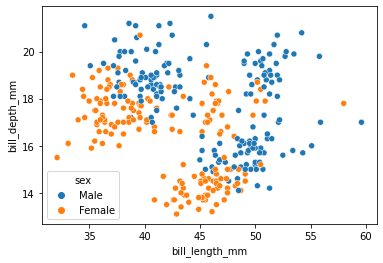

In [18]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="sex")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

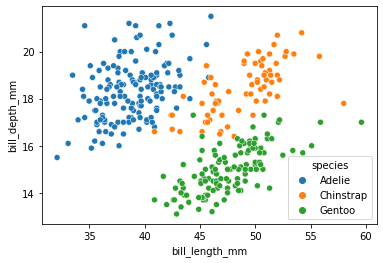

In [19]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="species")

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

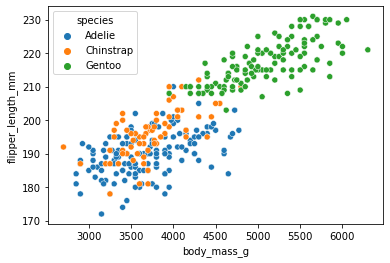

In [20]:
sns.scatterplot(data=dfp2, x="body_mass_g", y="flipper_length_mm", hue="species")

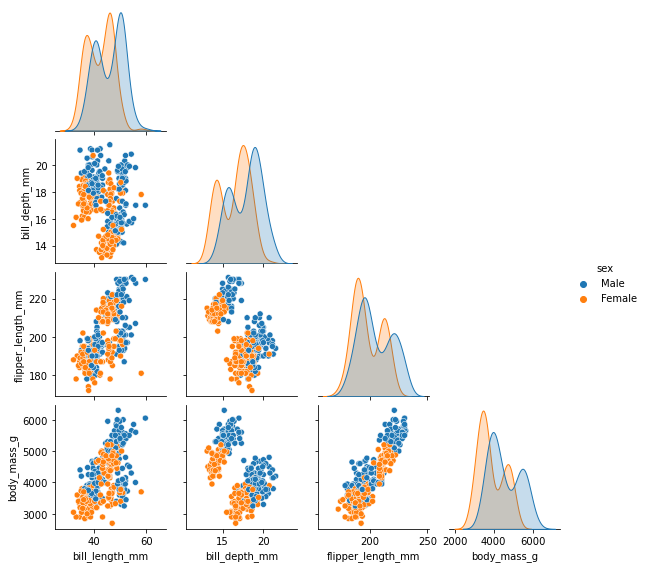

In [21]:
sns.pairplot(dfp2, corner=True, hue='sex', height=2.0)

In [22]:
# looks like bill depth and body mass work well
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [23]:
X = dfp2.iloc[:, [3,5]].values
y = dfp2.iloc[:, 6].values
print(X[0:4,:])
print(y[0:4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=10, p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",); print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

[[  18.7 3750. ]
 [  17.4 3800. ]
 [  18.  3250. ]
 [  19.3 3450. ]]
['Male' 'Female' 'Female' 'Female']
Confusion Matrix:
[[59  7]
 [ 7 61]]
Classification Report:
              precision    recall  f1-score   support

      Female       0.89      0.89      0.89        66
        Male       0.90      0.90      0.90        68

    accuracy                           0.90       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.90      0.90      0.90       134

Accuracy: 0.8955223880597015


In [24]:
#print(X_test)
print(X_test.shape)

(134, 2)


In [25]:
print(y_pred)

['Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Fema

[  2   3   5   7   8   9  10  11  12  13  14  17  18  19  20  21  25  27
  28  33  34  35  36  40  41  42  43  49  50  51  52  55  56  57  58  62
  64  69  71  72  74  78  80  84  86  88  89  91  93  95  98 100 101 102
 105 109 110 111 113 114 115 118 122 126 128 129 130 132] 68
[  0   1   4   6  15  16  22  23  24  26  29  30  31  32  37  38  39  44
  45  46  47  48  53  54  59  60  61  63  65  66  67  68  70  73  75  76
  77  79  81  82  83  85  87  90  92  94  96  97  99 103 104 106 107 108
 112 116 117 119 120 121 123 124 125 127 131 133] 66
(134,)
(134, 2)
(68, 2)
(66, 2)


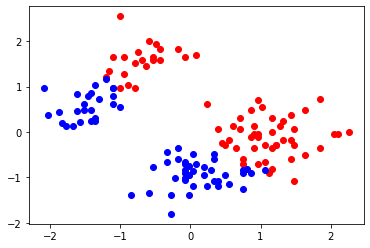

In [26]:
indxM = np.where(y_pred == 'Male')[0]
indxF = np.where(y_pred != 'Male')[0]
print(indxM, len(indxM))
print(indxF, len(indxF))
plt.scatter(X_test[indxM,0], X_test[indxM,1], color='red')
plt.scatter(X_test[indxF,0], X_test[indxF,1], color='blue')
print(y_pred.shape)
print(X_test.shape)
print(X_test[indxM,:].shape)
print(X_test[indxF,:].shape)

(333, 7) 133.20000000000002


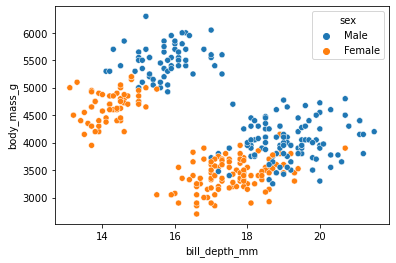

In [27]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

In [28]:
# borrowed from
# https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
# define bounds of the domain
x1min, x1max = X_test[:, 0].min()-1, X_test[:, 0].max()+1
x2min, x2max = X_test[:, 1].min()-1, X_test[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)
# create all of the lines and rows of the grid
xx1, xx2 = np.meshgrid(x1grid, x2grid)
print(xx1.shape)
print(xx2.shape)
#print(xx1)
#print(xx2)
#print(xx1.flatten())
#print(xx2.flatten())

(64, 64)
(64, 64)


In [29]:
#xx1xx2 = np.hstack((xx1.reshape((len(xx1),1)),xx2.reshape((len(xx2),1))))
xx1xx2 = np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
#xx1xx2 = np.vstack((xx1.flatten(), xx2.flatten()))

#print(xx1xx2)
print(xx1xx2.shape)

(4096, 2)


In [30]:
y_pred = classifier.predict(xx1xx2)
#print(y_pred)

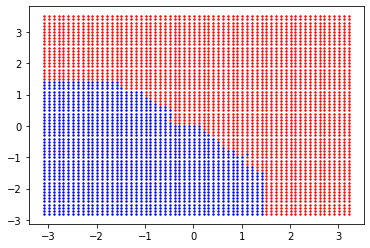

In [31]:
indxM = np.where(y_pred == 'Male')[0]
indxF = np.where(y_pred != 'Male')[0]
#print(indxM)
#print(indxF)
plt.scatter(xx1xx2[indxM,0], xx1xx2[indxM,1], color='red' , s=2)
plt.scatter(xx1xx2[indxF,0], xx1xx2[indxF,1], color='blue', s=2)

(333, 7) 133.20000000000002


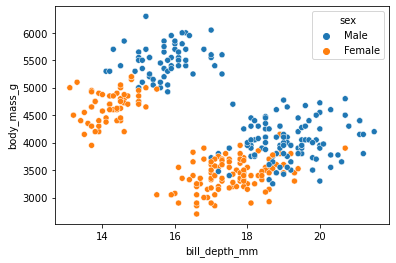

In [32]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

### Fairness

- what do we mean by this?
- can a binary classifier ever be fair?

As mentioned above, we'll be using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in machine learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is in Chapter 12 of our reference book [MLFCES]:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>


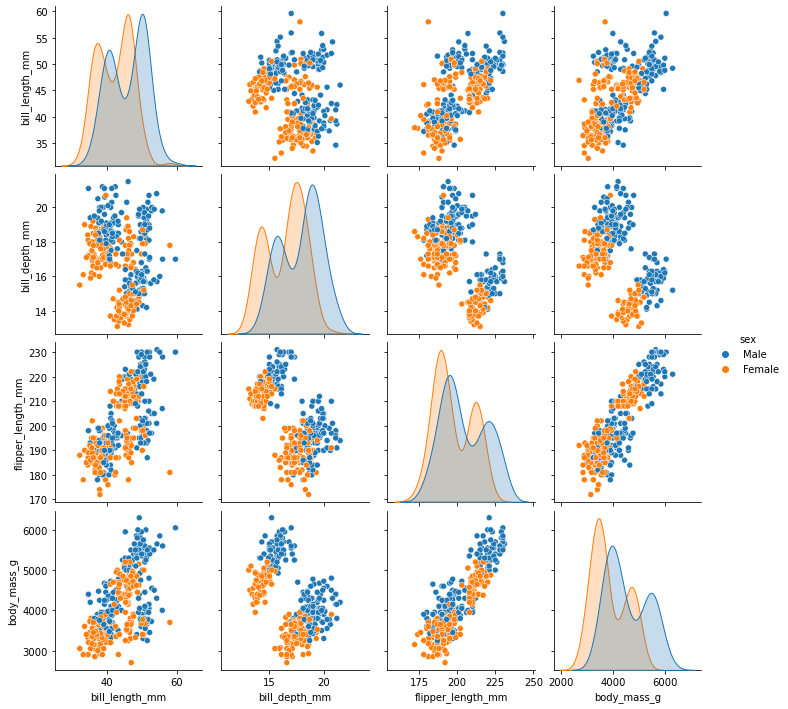

In [33]:
sns.pairplot(dfp2, hue='sex')

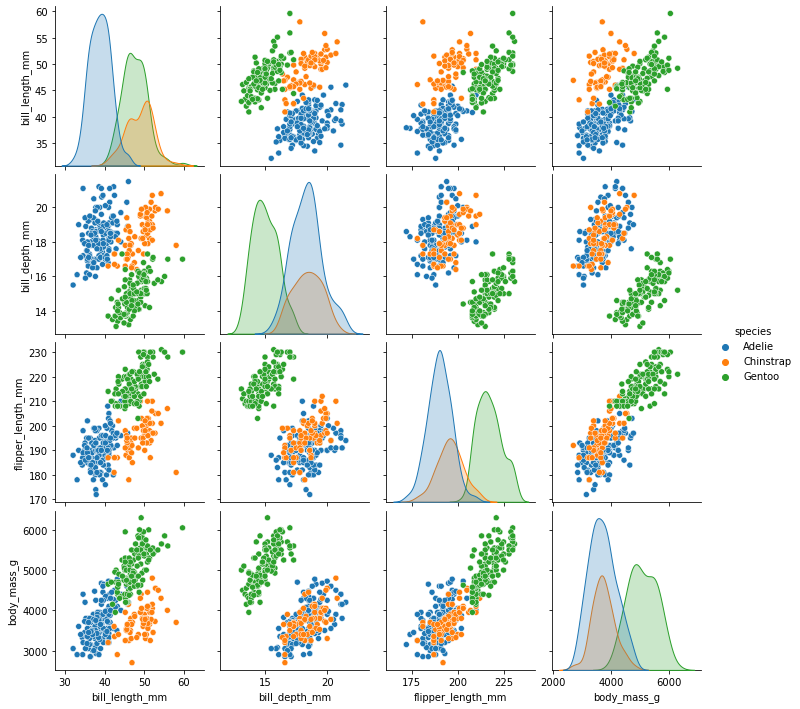

In [34]:
sns.pairplot(dfp2, hue='species')

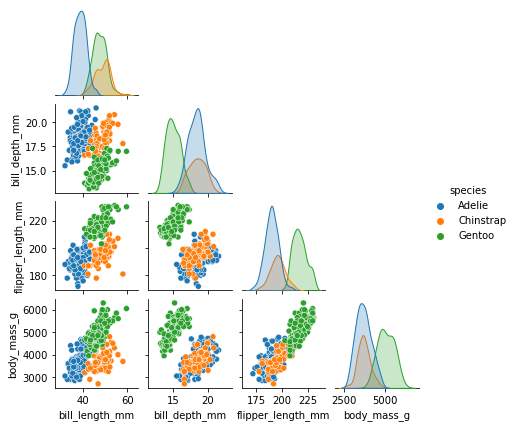

In [35]:
# lots of options for the above. See
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(dfp2, corner=True, hue='species', height=1.5)

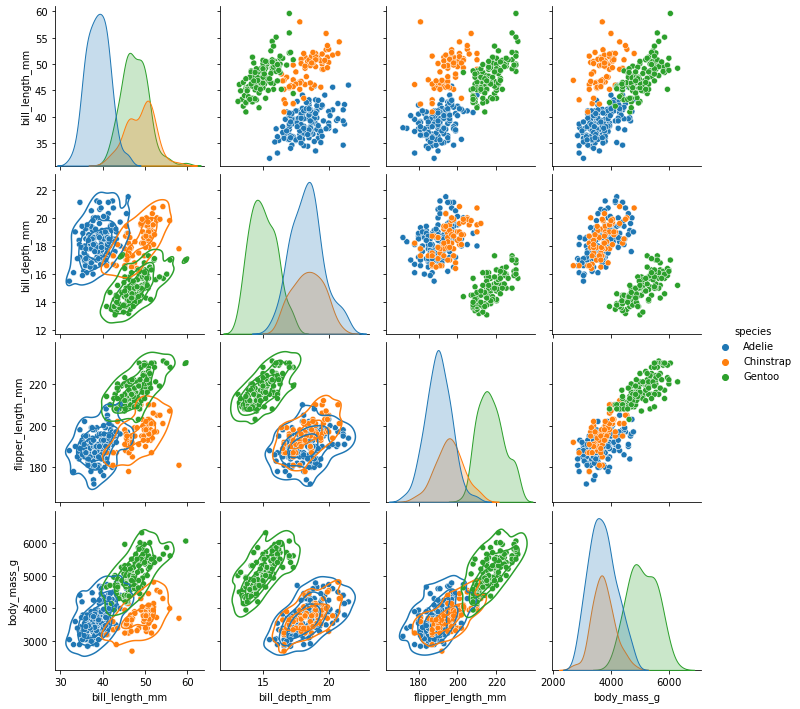

In [36]:
g = sns.pairplot(dfp2, diag_kind="kde", hue='species')
g.map_lower(sns.kdeplot, levels=4, color=".2")

The setting we assume at the outset is that we have a 'training set' of data consisting of 
$(x,y)$ pairs. 

Penguins

Use MNIST later on.

Need to do decision boundary

Need to comment on high norm choice in high dimensions



# extracting and plotting in `matplotlib`

We'll use this one

In [37]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [38]:
dfp2.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

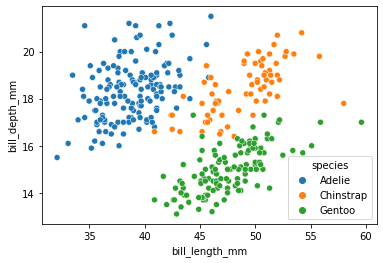

In [39]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [40]:
dfp2['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [41]:
dfA = dfp2.loc[dfp2['species'] == 'Adelie']
dfC = dfp2.loc[dfp2['species'] == 'Chinstrap']
dfG = dfp2.loc[dfp2['species'] == 'Gentoo']

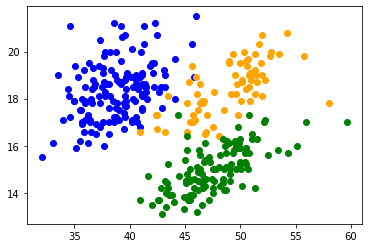

In [42]:
blA=np.array(dfA['bill_length_mm'].tolist())
bdA=np.array(dfA['bill_depth_mm'].tolist())
plt.scatter(blA,bdA,color='blue')

blC=np.array(dfC['bill_length_mm'].tolist())
bdC=np.array(dfC['bill_depth_mm'].tolist())
plt.scatter(blC,bdC,color='orange')

blG=np.array(dfG['bill_length_mm'].tolist())
bdG=np.array(dfG['bill_depth_mm'].tolist())
plt.scatter(blG,bdG,color='green')

In [43]:
dfA.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


## $k$-NN for regression

This technique can also be used for regression. See for example
<https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/>
for a demonstration of this using the California house data set
????????????

# Technical Notes

This originated from
<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook


In [44]:
%%bash
NBROOTNAME='4_concepts'
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 4_concepts.ipynb to html
[NbConvertApp] Writing 2270493 bytes to 4_concepts.html
[NbConvertApp] Converting notebook 4_concepts.ipynb to pdf
[NbConvertApp] Support files will be in 4_concepts_files/
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Making directory ./4_concepts_files
[NbConvertApp] Writing 83499 bytes to notebook.tex
[N

# title

here is  my equatiomn

$$
-\nabla^2 u = f
$$


In [45]:
print('finished')

finished
